<a href="https://colab.research.google.com/github/Hasinireddy-Ainavole/ML-Homework1/blob/main/Gradient_Descent_for_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparing Gradient Descent with Normal Equation for Linear Regression

Step 1: Creating our synthetic dataset
----------------------------------------
Generated 200 data points
True relationship: y = 3 + 4*x + noise
x values range from 0.0 to 5.0
y values range from 3.0 to 22.9
Design matrix X has shape: (200, 2) (200 rows, 2 columns)

Step 2: Solving with Normal Equation (Closed-Form)
--------------------------------------------------
Normal equation results:
  Estimated intercept: 2.9226 (true value: 3)
  Estimated slope:     4.0228 (true value: 4)

Step 3: Solving with Gradient Descent
------------------------------------------
Starting gradient descent with:
  Initial guess: θ₀ = 0.0, θ₁ = 0.0
  Learning rate: 0.05
  Max iterations: 1000

Iteration progress:
  Iteration  100: Cost = 0.274665, θ₀ = 2.4401, θ₁ = 4.1713
  Iteration  200: Cost = 0.220427, θ₀ = 2.7714, θ₁ = 4.0694
  Iteration  300: Cost = 0.215096, θ₀ = 2.8752, θ₁ = 4.0374
  Iteration  400: Cost = 0.214572, θ₀ = 2.9077,

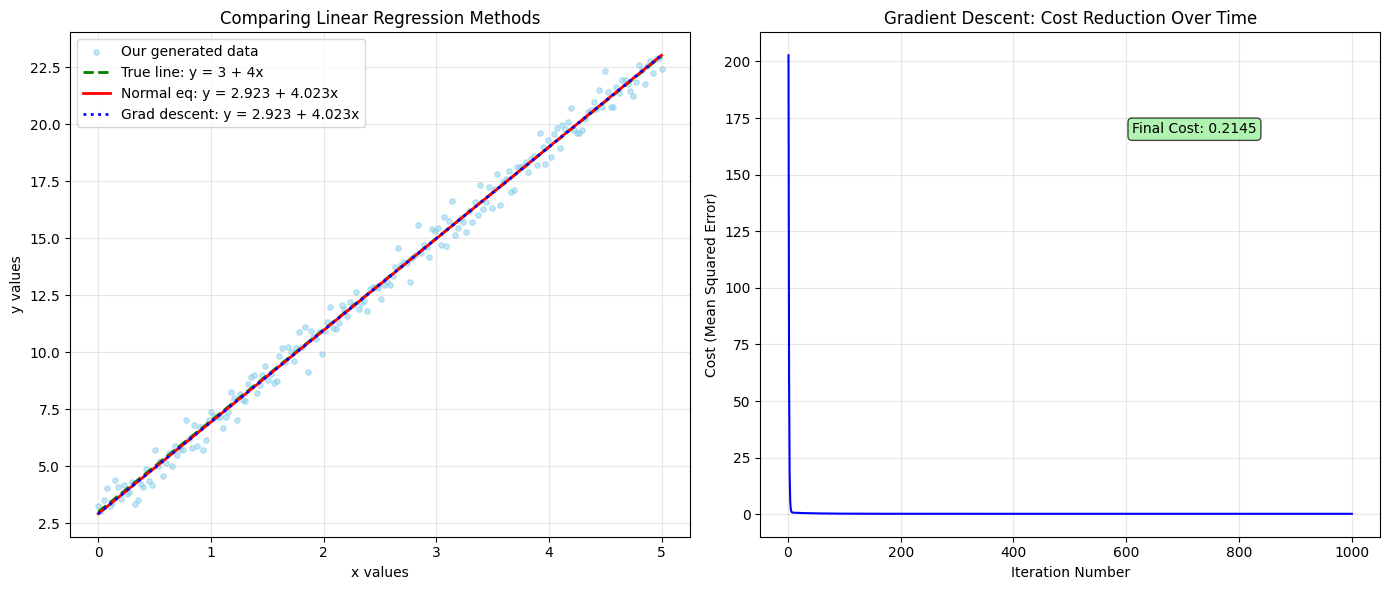

Step 6: Final analysis and conclusions
----------------------------------------
Performance metrics:
  Normal equation    - R²: 0.993740, MSE: 0.214515
  Gradient descent   - R²: 0.993740, MSE: 0.214515

Final Summary:
• Both methods successfully recovered parameters close to the true values
• Normal equation gave us the exact optimal solution instantly
• Gradient descent took 1000 iterations but reached nearly the same answer
• Final cost after gradient descent: 0.214515
• Both methods achieved very high R² scores (> 0.99), showing excellent fit
YES - Gradient descent converged to essentially the same solution as the normal equation.
The tiny differences are due to the iterative nature of gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Setting seed so we get the same results every time we run this
np.random.seed(42)


print("Comparing Gradient Descent with Normal Equation for Linear Regression")
print("=" * 70)

# Problem: Implement linear regression from scratch and compare two methods
# 1) Normal equation (closed-form solution)
# 2) Gradient descent (iterative optimization)

print("\nStep 1: Creating our synthetic dataset")
print("-" * 40)

# We need to generate data that follows: y = 3 + 4x + noise
# This means our true intercept is 3 and true slope is 4
n_samples = 200
x_vals = np.linspace(0, 5, n_samples)  # 200 points evenly spaced from 0 to 5

# These are our true parameters that we're trying to recover
true_intercept = 3
true_slope = 4

# Adding some random noise to make it realistic (real data is never perfect)
noise = np.random.normal(0, 0.5, n_samples)  # Gaussian noise with std=0.5
y_vals = true_intercept + true_slope * x_vals + noise

print(f"Generated {n_samples} data points")
print(f"True relationship: y = {true_intercept} + {true_slope}*x + noise")
print(f"x values range from {x_vals.min():.1f} to {x_vals.max():.1f}")
print(f"y values range from {y_vals.min():.1f} to {y_vals.max():.1f}")

# For linear regression, we need to add a column of 1's for the intercept term
# This is because our model is y = θ₀ + θ₁*x, so we need [1, x] for each sample
X_matrix = np.column_stack([np.ones(n_samples), x_vals])
print(f"Design matrix X has shape: {X_matrix.shape} (200 rows, 2 columns)")

print("\nStep 2: Solving with Normal Equation (Closed-Form)")
print("-" * 50)

# The normal equation gives us the exact solution in one step
# Formula: θ = (X^T * X)^(-1) * X^T * y
# This is like solving Ax = b by computing x = A^(-1) * b

# Let's break it down step by step:
XtX = X_matrix.T @ X_matrix              # X transpose times X
XtX_inverse = np.linalg.inv(XtX)         # Take the inverse
Xty = X_matrix.T @ y_vals                # X transpose times y
theta_normal = XtX_inverse @ Xty         # Final result

# Extract our parameters
normal_intercept = theta_normal[0]
normal_slope = theta_normal[1]

print("Normal equation results:")
print(f"  Estimated intercept: {normal_intercept:.4f} (true value: {true_intercept})")
print(f"  Estimated slope:     {normal_slope:.4f} (true value: {true_slope})")

print("\nStep 3: Solving with Gradient Descent")
print("-" * 42)

# Now let's implement gradient descent from scratch
# Start with random initial guess
theta_gd = np.array([0.0, 0.0])  # Initialize both intercept and slope to 0
learning_rate = 0.05             # How big steps to take (tuned by trial and error)
max_iterations = 1000            # Maximum number of steps

# We'll store the cost at each iteration to see how it decreases
cost_values = []

print(f"Starting gradient descent with:")
print(f"  Initial guess: θ₀ = {theta_gd[0]}, θ₁ = {theta_gd[1]}")
print(f"  Learning rate: {learning_rate}")
print(f"  Max iterations: {max_iterations}")
print("\nIteration progress:")

# Main gradient descent loop
for iteration in range(max_iterations):
    # Step 1: Make predictions with current parameters
    predictions = X_matrix @ theta_gd  # This is θ₀ + θ₁*x for each point

    # Step 2: Calculate how wrong we are (residuals)
    errors = y_vals - predictions

    # Step 3: Calculate cost (Mean Squared Error)
    current_cost = np.mean(errors**2)
    cost_values.append(current_cost)

    # Step 4: Calculate gradient (direction of steepest increase)
    # We want to go in opposite direction, so we'll subtract this
    gradient = -X_matrix.T @ errors / n_samples

    # Step 5: Update our parameters
    theta_gd = theta_gd - learning_rate * gradient

    # Print progress every 100 iterations so we can see it's working
    if (iteration + 1) % 100 == 0:
        print(f"  Iteration {iteration+1:4d}: Cost = {current_cost:.6f}, "
              f"θ₀ = {theta_gd[0]:.4f}, θ₁ = {theta_gd[1]:.4f}")

# Extract final parameters
gd_intercept = theta_gd[0]
gd_slope = theta_gd[1]

print(f"\nGradient descent final results:")
print(f"  Estimated intercept: {gd_intercept:.4f} (true value: {true_intercept})")
print(f"  Estimated slope:     {gd_slope:.4f} (true value: {true_slope})")

print("\nStep 4: Comparing the two methods")
print("-" * 37)

print("Summary of all results:")
print(f"  True parameters:      θ₀ = {true_intercept:.4f}, θ₁ = {true_slope:.4f}")
print(f"  Normal equation:      θ₀ = {normal_intercept:.4f}, θ₁ = {normal_slope:.4f}")
print(f"  Gradient descent:     θ₀ = {gd_intercept:.4f}, θ₁ = {gd_slope:.4f}")

# Check how close the two methods are to each other
intercept_diff = abs(normal_intercept - gd_intercept)
slope_diff = abs(normal_slope - gd_slope)


print(f"  Intercept difference: {intercept_diff:.6f}")
print(f"  Slope difference:     {slope_diff:.6f}")

# Check if they converged (within 0.001 tolerance)
converged_well = intercept_diff < 0.001 and slope_diff < 0.001
if converged_well:
    print(" Gradient descent converged very close to the normal equation solution!")
else:
    print("There's still some difference between the methods")

print("\nStep 5: Creating visualizations")
print("-" * 35)

# Create two plots side by side
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Show the data and both fitted lines
plot1.scatter(x_vals, y_vals, alpha=0.5, color='skyblue', s=15,
              label='Our generated data')

# Create smooth lines for plotting
x_smooth = np.linspace(0, 5, 100)
y_true_line = true_intercept + true_slope * x_smooth
y_normal_line = normal_intercept + normal_slope * x_smooth
y_gd_line = gd_intercept + gd_slope * x_smooth

# Plot all three lines
plot1.plot(x_smooth, y_true_line, 'g--', linewidth=2,
           label=f'True line: y = {true_intercept} + {true_slope}x')
plot1.plot(x_smooth, y_normal_line, 'r-', linewidth=2,
           label=f'Normal eq: y = {normal_intercept:.3f} + {normal_slope:.3f}x')
plot1.plot(x_smooth, y_gd_line, 'b:', linewidth=2,
           label=f'Grad descent: y = {gd_intercept:.3f} + {gd_slope:.3f}x')

plot1.set_xlabel('x values')
plot1.set_ylabel('y values')
plot1.set_title('Comparing Linear Regression Methods')
plot1.legend()
plot1.grid(True, alpha=0.3)

# Right plot: Show how the cost decreased during gradient descent
plot2.plot(range(1, max_iterations + 1), cost_values, 'b-', linewidth=1.5)
plot2.set_xlabel('Iteration Number')
plot2.set_ylabel('Cost (Mean Squared Error)')
plot2.set_title('Gradient Descent: Cost Reduction Over Time')
plot2.grid(True, alpha=0.3)

# Add a text box showing the final cost
final_cost = cost_values[-1]
plot2.text(0.6, 0.8, f'Final Cost: {final_cost:.4f}',
           transform=plot2.transAxes,
           bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

print("Step 6: Final analysis and conclusions")
print("-" * 40)

# Let's calculate some additional metrics to better understand our results
def compute_r_squared(actual_y, predicted_y):
    """Calculate R-squared (coefficient of determination)"""
    # How much variation does our model explain?
    total_sum_squares = np.sum((actual_y - np.mean(actual_y)) ** 2)
    residual_sum_squares = np.sum((actual_y - predicted_y) ** 2)
    r_squared = 1 - (residual_sum_squares / total_sum_squares)
    return r_squared

# Get predictions from both methods
predictions_normal = X_matrix @ theta_normal
predictions_gd = X_matrix @ theta_gd

# Calculate R-squared for both
r2_normal = compute_r_squared(y_vals, predictions_normal)
r2_gd = compute_r_squared(y_vals, predictions_gd)

# Calculate final MSE for both
mse_normal = np.mean((y_vals - predictions_normal) ** 2)
mse_gd = np.mean((y_vals - predictions_gd) ** 2)

print("Performance metrics:")
print(f"  Normal equation    - R²: {r2_normal:.6f}, MSE: {mse_normal:.6f}")
print(f"  Gradient descent   - R²: {r2_gd:.6f}, MSE: {mse_gd:.6f}")

print(f"\nFinal Summary:")
print(f"• Both methods successfully recovered parameters close to the true values")
print(f"• Normal equation gave us the exact optimal solution instantly")
print(f"• Gradient descent took {max_iterations} iterations but reached nearly the same answer")
print(f"• Final cost after gradient descent: {final_cost:.6f}")
print(f"• Both methods achieved very high R² scores (> 0.99), showing excellent fit")


if converged_well:
    print("YES - Gradient descent converged to essentially the same solution as the normal equation.")
    print("The tiny differences are due to the iterative nature of gradient descent.")
else:
    print("MOSTLY - Gradient descent got very close but didn't fully converge.")
    print("We could run more iterations or adjust the learning rate to get closer.")